<a href="https://colab.research.google.com/github/yug201/uber_taxi_fare_price_prediction/blob/main/uber_taxi_fare_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'uber-fares-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1834623%2F2994100%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240730%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240730T174813Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D57ef689a11612f83396d219aa235e27d566b10c68ed22c9a045b0c040cf9296aef319df2f35d486a80ca81d30ef8a278cf6cbb77b8210a477193b8b5c2e0bceae9b6553ba52d208cdd2cc90224bfdfddb637622aae602b274b2ae3f32cb8dda7bd45d4888fb8707e7eb2a13fc6cb09e5d66f158bdb98e2bc12d9adc9d8cd1aa845524869cf056d6675f7804fa732505b741fbf222e728a1639bb3d3a6333a88e6f20e70ef155e88d40abc2d59087fd4cd3ff78d2529ed8bed923351b20c70ed32759b64a8f4c37d1c29fdf7b0703e2663989b6acbe84ae7ba0abf44e48217e49a9ab07b82772a0ab2a1f766b100cc71c808805aa00927b622775ff1f716f7ae4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7378081 bytes downloaded
Downloaded and uncompressed: uber-fares-dataset
Data source import complete.


In [43]:
import pandas as pd


file_path = '/kaggle/input/uber-fares-dataset/uber.csv'

df1 = pd.read_csv(file_path)
df=df1[160000:]
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
160000,2815890,2011-04-21 17:18:23.0000002,6.1,2011-04-21 17:18:23 UTC,-73.968129,40.755434,-73.976662,40.743726,1
160001,21165496,2013-12-03 23:40:04.0000005,10.0,2013-12-03 23:40:04 UTC,-73.986258,40.772421,-73.953275,40.772634,1
160002,35923820,2013-07-19 01:20:00.00000057,6.0,2013-07-19 01:20:00 UTC,-74.008165,40.737997,-73.998075,40.738007,5
160003,40824256,2010-04-30 12:38:00.000000132,4.5,2010-04-30 12:38:00 UTC,-73.976472,40.788473,-73.972217,40.796573,1
160004,21244405,2011-11-09 20:28:20.0000003,7.3,2011-11-09 20:28:20 UTC,-73.965747,40.768761,-73.976038,40.780574,2


In [44]:
df = df.drop(['Unnamed: 0'],axis=1)

In [45]:

df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
160000,2011-04-21 17:18:23.0000002,6.1,2011-04-21 17:18:23 UTC,-73.968129,40.755434,-73.976662,40.743726,1
160001,2013-12-03 23:40:04.0000005,10.0,2013-12-03 23:40:04 UTC,-73.986258,40.772421,-73.953275,40.772634,1
160002,2013-07-19 01:20:00.00000057,6.0,2013-07-19 01:20:00 UTC,-74.008165,40.737997,-73.998075,40.738007,5
160003,2010-04-30 12:38:00.000000132,4.5,2010-04-30 12:38:00 UTC,-73.976472,40.788473,-73.972217,40.796573,1
160004,2011-11-09 20:28:20.0000003,7.3,2011-11-09 20:28:20 UTC,-73.965747,40.768761,-73.976038,40.780574,2


In [46]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 160000 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                40000 non-null  object 
 1   fare_amount        40000 non-null  float64
 2   pickup_datetime    40000 non-null  object 
 3   pickup_longitude   40000 non-null  float64
 4   pickup_latitude    40000 non-null  float64
 5   dropoff_longitude  40000 non-null  float64
 6   dropoff_latitude   40000 non-null  float64
 7   passenger_count    40000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.4+ MB


In [47]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,11.359205,-72.564038,39.935968,-72.535884,39.939766,1.688825
std,10.180639,11.350314,6.029515,10.315995,6.019702,1.313521
min,-50.500000,-736.400000,-74.010777,-75.375315,-74.006547,0.000000
25%,6.000000,-73.992088,40.734668,-73.991437,40.733950,1.000000
50%,8.500000,-73.981833,40.752427,-73.980158,40.753140,1.000000
75%,12.500000,-73.967234,40.767208,-73.963688,40.767809,2.000000
max,499.000000,40.806012,42.223633,40.816252,42.424147,6.000000


In [48]:

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z')

print(df.head())


                                  key  fare_amount           pickup_datetime  \
160000    2011-04-21 17:18:23.0000002          6.1 2011-04-21 17:18:23+00:00   
160001    2013-12-03 23:40:04.0000005         10.0 2013-12-03 23:40:04+00:00   
160002   2013-07-19 01:20:00.00000057          6.0 2013-07-19 01:20:00+00:00   
160003  2010-04-30 12:38:00.000000132          4.5 2010-04-30 12:38:00+00:00   
160004    2011-11-09 20:28:20.0000003          7.3 2011-11-09 20:28:20+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
160000        -73.968129        40.755434         -73.976662   
160001        -73.986258        40.772421         -73.953275   
160002        -74.008165        40.737997         -73.998075   
160003        -73.976472        40.788473         -73.972217   
160004        -73.965747        40.768761         -73.976038   

        dropoff_latitude  passenger_count  
160000         40.743726                1  
160001         40.772634                1  
16

In [49]:


# Extracting useful features from the 'datetime' column
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['second'] = df['pickup_datetime'].dt.second

print(df.head(10))


                                  key  fare_amount           pickup_datetime  \
160000    2011-04-21 17:18:23.0000002          6.1 2011-04-21 17:18:23+00:00   
160001    2013-12-03 23:40:04.0000005         10.0 2013-12-03 23:40:04+00:00   
160002   2013-07-19 01:20:00.00000057          6.0 2013-07-19 01:20:00+00:00   
160003  2010-04-30 12:38:00.000000132          4.5 2010-04-30 12:38:00+00:00   
160004    2011-11-09 20:28:20.0000003          7.3 2011-11-09 20:28:20+00:00   
160005    2009-11-24 15:49:45.0000002         11.7 2009-11-24 15:49:45+00:00   
160006    2009-05-28 13:46:42.0000001          8.5 2009-05-28 13:46:42+00:00   
160007  2013-03-13 08:51:00.000000112         11.5 2013-03-13 08:51:00+00:00   
160008    2010-04-24 14:56:14.0000003          5.3 2010-04-24 14:56:14+00:00   
160009    2013-04-09 22:54:46.0000001         10.0 2013-04-09 22:54:46+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
160000        -73.968129        40.755434         -73.9

In [50]:
df = df.drop(columns=['pickup_datetime',"key"])

In [51]:
# Compute the correlation matrix
correlation_matrix = df.corr()
correlation_with_fare_amount = correlation_matrix['fare_amount'].sort_values(ascending=False)
print(correlation_with_fare_amount)


fare_amount          1.000000
year                 0.119504
passenger_count      0.022516
month                0.017853
pickup_longitude     0.013063
dropoff_longitude    0.007971
second               0.001276
day                 -0.002038
dropoff_latitude    -0.010438
pickup_latitude     -0.013649
minute              -0.016424
hour                -0.022997
Name: fare_amount, dtype: float64


In [52]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
160000,6.1,-73.968129,40.755434,-73.976662,40.743726,1,2011,4,21,17,18,23
160001,10.0,-73.986258,40.772421,-73.953275,40.772634,1,2013,12,3,23,40,4
160002,6.0,-74.008165,40.737997,-73.998075,40.738007,5,2013,7,19,1,20,0
160003,4.5,-73.976472,40.788473,-73.972217,40.796573,1,2010,4,30,12,38,0
160004,7.3,-73.965747,40.768761,-73.976038,40.780574,2,2011,11,9,20,28,20
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,49,0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,9,0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,42,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,56,25


In [29]:
from sklearn.model_selection import train_test_split
x=df.drop('fare_amount',axis=1).values
y=df['fare_amount'].values
x_train , x_test , y_train , y_test =train_test_split(x,y, test_size= 0.8, random_state= 42)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf = RandomForestRegressor(max_depth=7 , max_features=3,n_estimators= 100)
rf.fit(x_train, y_train)
rf.score(x_train , y_train)
rf.score(x_test , y_test)

0.5622255925264195

In [65]:
y_pred = rf.predict(x_test)
y_pred
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,4.5,8.744001
1,12.5,9.566122
2,6.1,8.685792
3,13.0,11.270731
4,9.0,9.535992
5,8.0,9.572964
6,7.0,9.472844
7,8.9,8.633421
8,6.5,19.770345
9,6.5,9.499857


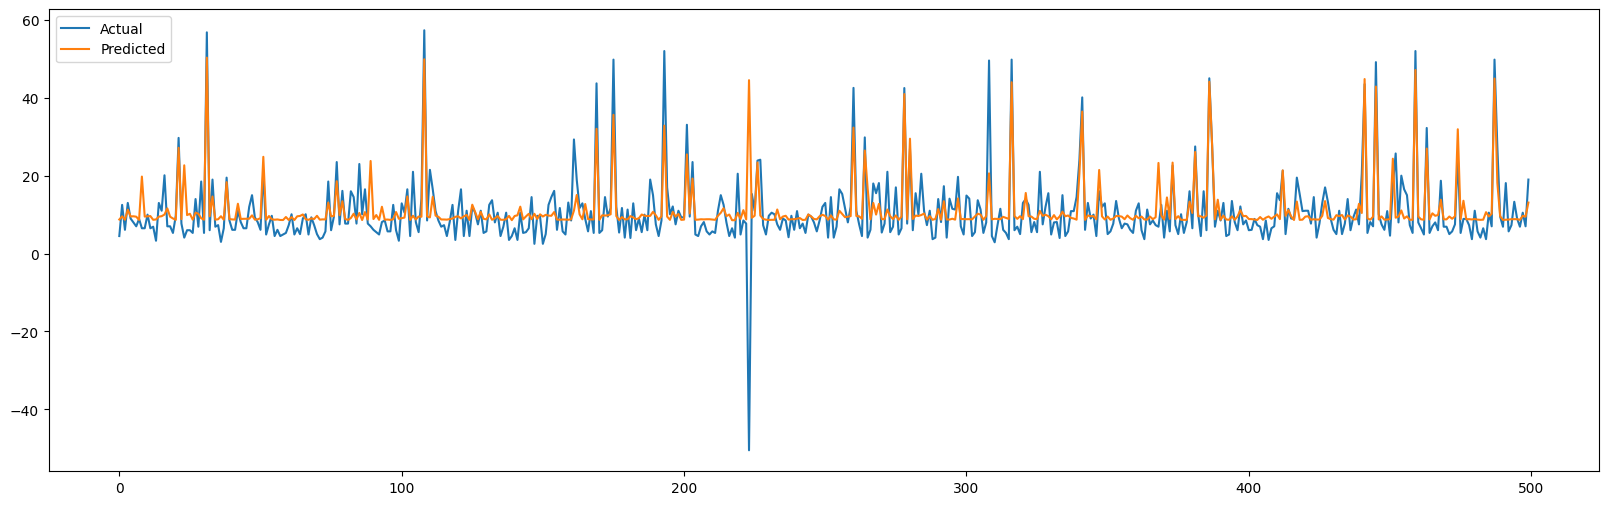

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize= (20,6))

plt.plot(df3[:500])
plt.legend(["Actual" , "Predicted"])

In [33]:
from sklearn.metrics import r2_score
rf_score = r2_score(y_test , y_pred)
rf_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
mse = mean_squared_error (y_test , y_pred)
print (mse)

mae = mean_absolute_error (y_test , y_pred)
print (mae)

mape = mean_absolute_percentage_error (y_test , y_pred)
print (mape)

46.69851423322047
3.85960765342581
1782963996339.9814


In [36]:
import pandas as pd


file_path = '/kaggle/input/uber-fares-dataset/uber.csv'

df1 = pd.read_csv(file_path)
df2=df1[:70000]
df2.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [39]:
from sklearn.model_selection import train_test_split
x2=df.drop('fare_amount',axis=1).values
y2=df['fare_amount'].values
x_train2 , x_test2 , y_train2 , y_test2 =train_test_split(x2,y2, test_size= .8, random_state= 42)
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor()
# rf = RandomForestRegressor(max_depth=7 , max_features=3,n_estimators= 100)
# rf.fit(x_train2, y_train2)
# rf.score(x_train2 , y_train2)
# rf.score(x_test 2, y_test2)

In [60]:
y_pred = rf.predict(x_test2)
y_pred
df3 = pd.DataFrame({"Y_test": y_test2 , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,4.5,8.744001
1,12.5,9.566122
2,6.1,8.685792
3,13.0,11.270731
4,9.0,9.535992
5,8.0,9.572964
6,7.0,9.472844
7,8.9,8.633421
8,6.5,19.770345
9,6.5,9.499857
